# Image Data for Machine Learning

### Introduction

In computer vision and machine learning, images are not just pictures—they’re data. Behind every image is a grid of numbers that represent the intensity of light or colour at each pixel. These numbers form a structured array, which can be processed by machine learning models to recognise patterns, make predictions, or classify content.

Each image has three key components:

- *Height* – the number of pixels from top to bottom  
- *Width* – the number of pixels from left to right  
- *Colour channels* – the number of layers used to store colour information  

The structure of an image is typically written as:

```
(Height, Width, Channels)
```

For example, a standard colour image that is 64 pixels wide and 64 pixels tall with 3 colour channels would be represented as:

```
(64, 64, 3)
```

This 3D array format allows us to process and manipulate image data using numerical tools such as NumPy and OpenCV.

### Colour channels: RGB vs. Grayscale

Most digital images use the *RGB* format, which includes three separate channels for Red, Green, and Blue. Each channel is a 2D grid of values between 0 and 255, representing how intense that colour is at each pixel. When all three channels are combined, they produce a full-colour image.

Some images, however, are in *grayscale*. These images use just one channel to represent brightness or light intensity. A grayscale image has dimensions like:

```
(Height, Width, 1)
```

Each pixel has a single value from 0 (black) to 255 (white), with shades of grey in between. Grayscale images are simpler and take up less space, which can be useful when colour information isn't important for the task.

### Preprocessing image data

Preprocessing is a crucial step in preparing image data for machine learning. Raw images often come in different sizes, formats, and quality levels, which can confuse a model and lead to poor performance. Preprocessing helps to clean, standardise, and enrich the dataset so that models can learn more effectively.

When done properly, it improves model accuracy, speeds up training, and helps the model generalise better to new images. Here are some of the key techniques involved:

- *Resizing* – Images in a dataset often have different dimensions. Resizing makes sure that all images are the same size, which is essential because machine learning models expect a fixed input shape. For example, all images might be resized to 128×128 pixels.

- *Normalisation* – Pixel values in an image usually range from 0 to 255. Normalisation scales these values down to a smaller range—typically from 0 to 1—so that the model can learn more efficiently. This helps prevent certain features from overpowering others due to large numeric differences.

- *Data Augmentation* – Instead of collecting more images, we can artificially increase the size and diversity of the dataset by applying simple transformations to existing images. These include:
  - *Flipping* (horizontally or vertically)
  - *Rotating* at various angles
  - *Zooming in or out*
  - *Shifting* images left, right, up, or down  
This makes the model more robust by exposing it to a wider variety of examples.

- *Flattening* – Traditional machine learning algorithms (like decision trees or support vector machines) require input as a one-dimensional vector. Flattening takes the 2D image, or 3D if colour (width, height, RGB channels), and turns it into a long row of pixel values so that it can be used with these models. These models are not always the best for image data, unlike *Convolutional Neural Networks (CNNs)*, that do not require this step and instead operate with all three dimensions.

Machine learning models — especially *CNNs*, require input images to be in a consistent format. If your dataset includes images of different sizes or channel types (some RGB, some greyscale), it can confuse the model and reduce performance.

To avoid this, you need to:
- *Resize* all images to the same dimensions  
- *Normalise* pixel values so they fall within a common range (e.g. 0 to 1)  
- *Ensure consistent colour format*—either converting all to RGB or all to greyscale  

Uniform image input makes it easier for the model to extract useful features and generalise to new, unseen images.

In short, these steps help turn a messy collection of images into a structured, consistent dataset that’s ready for training. When you preprocess your data well, you give your model the best chance to learn from it accurately and reliably.

## Load image data for classification tasks
When working on an image classification task, such as distinguishing between cats and dogs, it is essential to organise the dataset in a structured format. A common approach is to store images in separate folders based on their categories (like movie review sentiment data).

For this example, we assume that our dataset is stored in a directory `./cats_dogs/train/`, which contains two subdirectories `cats/` and `dogs/` where each folder holds multiple images of the respective animal:

```
./cats_dogs/train/
    cats/
      cat_1.jpg
      cat_2.jpg
      ...
    dogs/
      dog_1.jpg
      dog_2.jpg
      ...
```
This folder structure is widely used because it allows for easy dataset management and seamless integration with deep learning libraries such as TensorFlow, PyTorch, and OpenCV. Most deep learning frameworks have built-in functions that can automatically load images from such structured directories, making preprocessing and training more efficient.

### Installing Python libraries

In [1]:
%pip install --upgrade pip

%pip install opencv-python numpy scikit-learn matplotlib pandas -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Download the dataset

In [2]:
import os
import urllib.request
import zipfile

# Define URL and target filenames
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
root_dir = "../data/"
zip_path = root_dir + "cats_and_dogs_filtered.zip"
extract_dir = root_dir + "cats_dogs"

# Download the zip file
print("Downloading dataset...")
urllib.request.urlretrieve(url, zip_path)
print("Download complete.")

# Extract the zip file
print("Extracting files...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Extraction complete.")

# Delete the zip file
print("Cleaning up...")
os.remove(zip_path)
print("Cleanup complete.")


Download complete.
Extracting files...
Extraction complete.
Cleaning up...
Cleanup complete.


### Loading the data

The following code sets up key parameters and data structures for processing our image classification dataset. It defines the image size, dataset path, class labels, and initialises empty lists to store image data and labels for training a model.

First we set a fixed size of 64×64 pixels for all images. Resizing ensures that all images have the same dimensions, which is necessary for consistent input into a machine learning model.

We then define the path where the dataset images are stored. This path will be used to load images from different class folders (e.g., "train/cats" and "train/dogs"):

In [3]:
IMG_SIZE = 64  # Resize images to 64x64

DATASET_PATH = root_dir + "cats_dogs/cats_and_dogs_filtered/train/" # Path to the folder containing data

categories = ["cats", "dogs"]  # The subfolders - class labels

We also create two lists to store the data we'll use for training:

- *`X`* – This list will hold the actual image data. After each image is read, resized, and possibly converted to grayscale, we’ll store the resulting pixel array in `X`. These arrays represent the *features*—the information the model will learn from.

- *`Y`* – This list will hold the *labels* or target values that tell the model what each image represents. For example, we might use `0` for cats and `1` for dogs. These labels are what the model tries to predict during training.

Together, `X` and `Y` form the foundation of any supervised machine learning task:  
- `X` contains *what the model sees*  
- `Y` contains *what the model should learn to predict*

In [4]:
X, Y = [], []  # Features and Labels

### Load the images from each folder

To begin working with the *Cats vs Dogs* image dataset, we first need to gather all the image files from their respective folders. We use the `glob` module to automatically find the file paths for every image in the dataset. This saves us from having to manually list or open each file.

Once we have the file paths, we use OpenCV’s `cv2.imread()` function to read each image into memory. This step converts the image into a format that can be processed in Python. After loading, we apply a series of *preprocessing steps* to prepare the image data for machine learning. These steps include resizing, adjusting colour formats, and normalising pixel values so everything is consistent and ready for training.

### Resizing

When working with image data, it’s common for images to have *different sizes and resolutions*. Some might be small and square, others large and rectangular. However, machine learning models—especially deep learning models like *Convolutional Neural Networks (CNNs)*—need all images to have a *consistent input size*.

To solve this, we *resize* every image to a fixed shape, such as `64x64` pixels. This means all images are converted to the same width and height, regardless of their original size.

This is important for a few reasons:

- *Neural networks expect fixed input dimensions.* They’re designed to accept input of a specific shape (e.g., `(64, 64, 3)` for a colour image). If each image has a different shape, the model won’t know how to process them in batches.

- *Resizing reduces computational cost.* A large image (such as `1024x1024`) contains a lot more pixels than a small one, which means it takes longer to train the model and uses more memory. By shrinking all images to a smaller, consistent size, we make training faster and more efficient.

- *It helps the model generalise better.* While resizing may remove some small details, it encourages the model to focus on broader patterns—such as shapes and edges—rather than unnecessary fine-grained texture. This improves performance on new, unseen images.

### Converting from BGR to RGB

OpenCV loads images using a colour format called *BGR* (Blue-Green-Red), where the order of colour channels is different from the standard *RGB* (Red-Green-Blue) used by most other libraries like Matplotlib, TensorFlow, or PIL.

If we don’t fix this, the colours in the image will look wrong—for example, reds might appear blue, and vice versa.

To correct the colour order, we use the function `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`. This swaps the channels so the image is displayed and processed in the correct format. It’s a small but important step that ensures colour accuracy across the entire pipeline.

### Normalising pixel values

When images are stored digitally, each pixel has a brightness value—ranging from *0 (darkest)* to *255 (brightest)*. These values are integers, and while they work well for displaying images, they can cause problems when used directly in machine learning models.

To make the data easier to work with, we *normalise* the pixel values. This means we scale them down to a *range between 0 and 1* by dividing each value by `255.0`.

This step is helpful for several reasons:

- *It improves model stability.* Models perform better when input values are small and within a predictable range. Large values like 255 can cause the model to update unevenly during training, making learning slower or unstable.

- *It ensures fairness in learning.* Without normalisation, pixels with high values could have more influence than others, even if they’re not more important. Scaling the data ensures that all pixels contribute equally to what the model learns.

- *It improves consistency across images.* Brightness and lighting conditions can vary across images. Normalising helps reduce these differences, so the model focuses on meaningful content rather than being misled by uneven lighting.

### Storing the results

After processing, each image is added to a list called `X`. This list stores the image data—what the model will use as input. At the same time, we assign each image a label and store it in a second list called `Y`. The labels tell the model what kind of image it is:
- `0` for a cat  
- `1` for a dog

This structure—images in `X` and labels in `Y`—creates a clear and organised dataset that we can use to train a model. It ensures that all images have been processed in the same way and that every input has a matching output:

In [5]:
import os, glob, cv2  # Import libraries for file handling and image processing

# Loop through each category (e.g. "cats", "dogs")
for category in categories:
    path = os.path.join(DATASET_PATH, category)  # Full path to the category folder
    label = categories.index(category)  # Assign numeric label: 0 for "cats", 1 for "dogs"

    # Loop through all .jpg files in the current category folder
    for img_path in glob.glob(f"{path}/*.jpg"):
        img = cv2.imread(img_path)  # Read image using OpenCV
        if img is None:
            continue  # Skip if image couldn't be read

        # Resize image to (IMG_SIZE x IMG_SIZE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # Convert image from BGR (OpenCV default) to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Normalize pixel values to range [0, 1]
        img = img / 255.0

        # Append processed image and label to the dataset lists
        X.append(img)
        Y.append(label)


### Inspecting our image training data

Now that we’ve finished processing all the images, we need to convert our list of images (`X`) into a format that’s easier and faster for the computer to work with. We do this by turning it into a *NumPy array*, which is a type of data structure used to store numbers efficiently in Python.

Using a NumPy array has a few benefits:
- It’s much faster for calculations than a regular list  
- It uses less memory  
- It’s the format that most machine learning tools expect

We also make sure the numbers in the array are stored as *floating-point numbers* (`float32`). This is a common format used in machine learning, especially for neural networks. It works well with the *normalised pixel values* we created earlier (which now range from 0 to 1 instead of 0 to 255).

Finally, we print out how many images were loaded to double-check that everything worked correctly and that the dataset is complete. This helps us confirm that the preprocessing step didn’t miss or skip any files:

In [6]:
import numpy as np

X = np.array(X, dtype=np.float32)
Y = np.array(Y)

print("Number of images:", len(X))
print("Shape of X:", X.shape, "(num_samples,", IMG_SIZE, "*", IMG_SIZE, "*3)")


Number of images: 2000
Shape of X: (2000, 64, 64, 3) (num_samples, 64 * 64 *3)


### Understanding the structure of the image dataset

Once the images have been converted into a NumPy array (`X`), we can check its *shape*—which tells us how the data is organised.

The shape will look something like this:

```
(number_of_images, image_height, image_width, colour_channels)
```

For example, if we resized all images to `64x64` pixels and used colour (RGB), the shape might look like:

```
(1000, 64, 64, 3)
```

This means:
- *1000 images* in total  
- Each image is *64 pixels tall and 64 pixels wide*  
- Each image has *3 colour channels* (red, green, and blue)

This check is important because it confirms that every image has been resized and formatted in the same way, which is necessary before training a machine learning model.

We also convert our list of labels (`Y`) into a Pandas Series. This makes it easy to count how many images belong to each class—for example, how many are cats and how many are dogs.

This quick count helps us see if the dataset is *balanced* (roughly the same number of each class) or *imbalanced* (more of one than the other). A balanced dataset is often better for training because it avoids giving too much importance to one type of image:

In [7]:
import pandas as pd

print("Label distribution:")
print(pd.Series(Y).value_counts())

Label distribution:
0    1000
1    1000
Name: count, dtype: int64


If both labels have equal counts, the dataset is balanced. If one label has significantly more images than the other, the model might become biased towards the majority class.

At this point, each image has been transformed into a single row of raw pixel values, creating a large feature space (e.g. 12,288 columns for color images at 64×64 resolution). Next, we can apply feature selection.

## Image augmentation

Once our images are prepared and ready for training, we can take an extra step to make our model even more effective—*image augmentation*. This simply means creating slightly altered versions of each image to give the model more variety to learn from.

But why is this helpful?

In many real-world situations, images of the same object can look a bit different. For example, a photo of a dog might be taken from a different angle, in brighter lighting, or while the dog is facing the other way. If our model only trains on one version of each image, it might learn to recognise *that specific image*, instead of learning to recognise *dogs in general*. This can lead to a problem called *overfitting*, where the model does well on training images but struggles with new ones.

Image augmentation solves this by creating new, slightly different versions of existing images. We don’t need to collect more data—just use what we already have and apply small changes, such as:
- *Flipping* the image horizontally or vertically  
- *Rotating* it slightly (e.g., 30 degrees)  
- *Scaling* the image down (zooming out)  
- *Cropping* a smaller section of the image  
- *Changing the brightness*  
- *Adding noise*, which mimics imperfections you might get from a camera

These changes help the model become more flexible and able to handle everyday variations in images. It makes the model more robust and better at generalising to new photos it hasn’t seen before.

To make this easier, we create a function called `augment_image(img)`. This function takes one image and returns a collection of modified versions. Each variation is stored in a dictionary, where the name (like `"rotated"` or `"flipped"`) describes what kind of transformation was applied.

This allows us to train our model on a richer, more diverse set of images, even if we only started with a small dataset. In the end, the model becomes more reliable and more capable of recognising objects in the real world:

In [8]:
def augment_image(img):
    # Dictionary to store transformed images
    transformations = {
        "Original": img,  # Keep the original image

        # Rotate the image 30 degrees around the center
        "Rotated 30°": cv2.warpAffine(
            img,
            cv2.getRotationMatrix2D((IMG_SIZE//2, IMG_SIZE//2), 30, 1.0),
            (IMG_SIZE, IMG_SIZE)
        ),

        # Flip the image horizontally (mirror effect)
        "Flipped Horizontally": cv2.flip(img, 1),

        # Flip the image vertically (upside-down)
        "Flipped Vertically": cv2.flip(img, 0),

        # Resize the image to 80% of its original size
        "Scaled 80%": cv2.resize(img, (int(IMG_SIZE * 0.8), int(IMG_SIZE * 0.8))),

        # Crop a central portion of the image (if it's large enough)
        "Random Crop": img[8:56, 8:56] if img.shape[0] > 56 else img,

        # Add Gaussian noise to simulate camera imperfections
        "Gaussian Noise": np.clip(img + 0.05 * np.random.randn(*img.shape), 0, 1)
    }

    # Return all transformed images
    return transformations


### Augmentation in practice

To see how augmentation works in action, we pick one image from our dataset (in this case, the first image in `X[0]`) and pass it through our `augment_image` function. This function creates several new versions of the image by applying different transformations—like rotating, flipping, cropping, and adding noise.

To help us understand what each transformation looks like, we create a second function called `show_augmentations`. This function displays all the augmented images side by side in a single row so we can easily compare them.

A blank canvas is created for the plot. We then go through each transformed version of the image in the dictionary returned by `augment_image`. For each one, a *subplot* is created using `plt.subplot(...)`—this is like adding a new image panel next to the previous one.  

Each image is shown using `plt.imshow(img)`, and we add a title above it to explain what kind of transformation was applied (e.g. *"Rotated 30°"*, *"Flipped Horizontally"*).  

The axis lines are hidden using `plt.axis("off")` to keep the display clean.  

This visual check helps us make sure the augmentations look reasonable before we use them to train our model. It also shows how much variation we can get from a single image—giving our model a much better chance to learn patterns that apply in real-world situations:

len of images gen 7


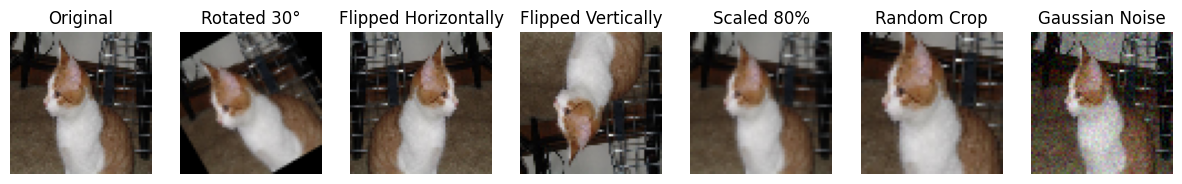

In [19]:
import matplotlib.pyplot as plt

# Select a sample image (the first one in the collection)
sample_img = X[0]

augmented_images = augment_image(sample_img)

print('len of images gen', len(augmented_images.items())) # len of images gen 7

def show_augmentations(augmented_images):

    plt.figure(figsize=(15, 4))

    for i, (title, img) in enumerate(augmented_images.items()):
        plt.subplot(1, len(augmented_images), i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.show()

show_augmentations(augmented_images)

### Flattening images for traditional Machine Learning models

Most traditional machine learning models—like *Support Vector Machines (SVMs)*, *Decision Trees*, or *Logistic Regression*—are designed to work with data in the form of tables. In these models, each *row* represents a single example (like an image), and each *column* represents a single feature (like a pixel value). This means they expect input as 1D vectors (a list of numbers), not 2D images.

However, images are naturally stored as 2D (or even 3D) arrays. For example, a colour image of size `64×64` pixels with 3 colour channels (RGB) is stored as a 3D array with the shape:

```
(64, 64, 3)
```

To use this image with a traditional model, we need to *flatten* it—that is, stretch out all the pixel values into a single row of numbers. This gives us:

```
(1, 12288)
```
because `64 × 64 × 3 = 12,288`. 

So instead of rows and columns, we have a single long list containing all the pixel values.

Flattening allows us to apply machine learning models to image data using the same techniques we would use for structured data like spreadsheets or sensor readings.

However, there’s a trade-off! Flattening removes the structure of the image. In other words, the model can no longer tell which pixels were near each other, or recognise shapes or patterns. Each pixel is treated as if it’s unrelated to the ones around it.

To overcome this limitation, we sometimes apply extra steps—like *dimensionality reduction* (e.g. PCA), or *feature extraction* using edge detectors or filters—to help capture useful patterns before training the model.

Even with these limits, flattening is a helpful way to use simpler, faster models on image data—especially when working with smaller datasets or when deep learning is not practical:

In [20]:
type(X)

numpy.ndarray

In [21]:
len(X)

2000

In [ ]:
X_flattened = X.reshape(len(X), -1)

print(f"New Feature Shape: {X_flattened.shape}")

This line of code reshapes the image dataset `X` so that it can be used with traditional machine learning models, which expect data in a 2D table-like format—where each row is one example (one image), and each column is a feature (in this case, a single pixel value).

Originally, `X` is a 4D NumPy array, meaning it stores images in the following structure:

```
(num_samples, IMG_SIZE, IMG_SIZE, 3)
```

This is perfect for deep learning models like CNNs, which are designed to handle multi-dimensional image data. But for more traditional models (like logistic regression or decision trees), we need to flatten each image into a single long row of pixel values. The line:

```
X = X.reshape(len(X), -1)
```

does exactly that. It keeps the number of images the same (the first dimension), and flattens each image into a 1D list of all its pixel values. The `-1` tells NumPy to figure out how many columns are needed based on the total number of values.

In our example, `64 × 64 × 3 = 12,288` pixel values per image, so the reshaped data would have the shape:

```
(2000, 12288)
```

This means we have 2000 images, each represented as a row of 12,288 numbers, ready to be used by traditional machine learning models that expect flat, structured data.

## What have we learnt?

In this section, we explored how to prepare an image dataset for machine learning in a way that is clean, consistent, and ready for training. We followed a step-by-step process to make sure the data was in the right format and suitable for model learning.

We started by *loading images* from two folders—`cats/` and `dogs/`—and gave each image a label: `0` for cats and `1` for dogs. These images were stored in lists, creating a structured dataset for further processing.

Because real-world images often come in different sizes and formats, we applied several important *preprocessing steps*:
- *Resizing* all images to a fixed size of `64×64` pixels so they could be processed uniformly  
- *Converting colour format* from BGR to RGB to match the standard expected by most tools  
- *Normalising pixel values* to a range between `0` and `1`, which helps models train more efficiently and with greater stability

After that, we converted the image data and labels into *NumPy arrays*—a format that allows for fast processing and compatibility with machine learning and deep learning tools. We also checked the shape of the dataset and reviewed how many images were in each category, ensuring everything was loaded correctly and evenly balanced between cats and dogs.

To improve the model’s ability to generalise to new data, we used *data augmentation*. This involved creating new versions of each image by applying simple transformations—such as *rotating, flipping, scaling, cropping*, and *adding noise*. These variations helped the model learn from different perspectives, rather than simply memorising the training images.

Finally, we *visualised* the augmented images using Matplotlib to make sure the transformations looked reasonable and worked as expected.

These steps gave us a well-prepared dataset that’s ready to be used in training a machine learning or deep learning model—one that can recognise and classify new images with greater accuracy and confidence.

## Recommended Datasets

1. *[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)* – A dataset of *60,000 colour images (32×32) across 10 classes*, commonly used for quick experiments on small images due to its manageable size and diverse categories.  

2. *MNIST* *(Built into many libraries like Keras, PyTorch)* – Contains *70,000 grayscale images (28×28) of handwritten digits (0 to 9)* and is widely used as a benchmark for simple classification tasks.  

3. *[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)* – Features *70,000 grayscale images (28×28) of clothing items*, designed as a more complex alternative to MNIST for evaluating models on fashion-related classification.  

4. *[ImageNet](http://www.image-net.org/)* – A massive dataset with *millions of images categorised into 1,000 classes*, serving as the gold standard for evaluating convolutional neural networks (CNNs) in large-scale image recognition.  

5. *[Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/)* – Comprising *20,580 images of 120 dog breeds*, this dataset is ideal for fine-grained classification tasks involving detailed object differentiation.